# EDA

--- 
## Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

--- 
## Load Data

In [52]:
path = '../data/'
df = pd.read_csv(path+'refined_wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


In [53]:
# store variable names in a list for easier iteration
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',	'density', 'pH', 'sulphates', 'alcohol']

--- 
## Explore the Dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         985 non-null    float64
 1   volatile acidity      985 non-null    float64
 2   citric acid           985 non-null    float64
 3   residual sugar        985 non-null    float64
 4   chlorides             985 non-null    float64
 5   free sulfur dioxide   985 non-null    float64
 6   total sulfur dioxide  985 non-null    float64
 7   density               985 non-null    float64
 8   pH                    985 non-null    float64
 9   sulphates             985 non-null    float64
 10  alcohol               985 non-null    float64
 11  quality               985 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 92.5 KB


In [55]:
for var in variables:
    print(f"Number of unique values for {var}: {len(df[var].unique())}")

Number of unique values for fixed acidity: 71
Number of unique values for volatile acidity: 128
Number of unique values for citric acid: 69
Number of unique values for residual sugar: 37
Number of unique values for chlorides: 81
Number of unique values for free sulfur dioxide: 39
Number of unique values for total sulfur dioxide: 106
Number of unique values for density: 356
Number of unique values for pH: 67
Number of unique values for sulphates: 57
Number of unique values for alcohol: 52


# A catplot for each data value

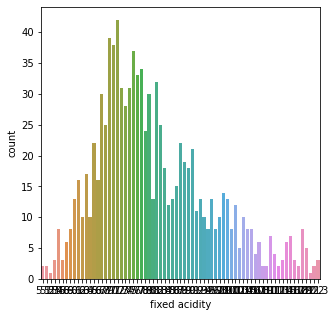

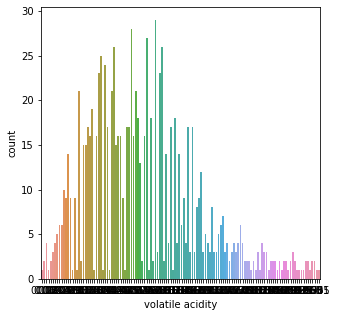

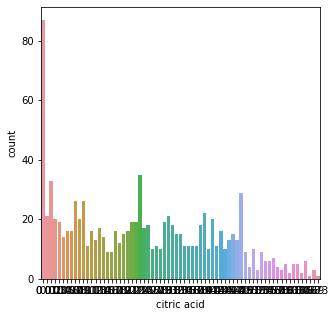

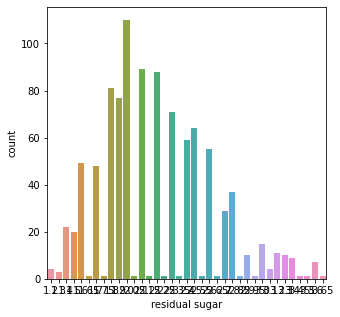

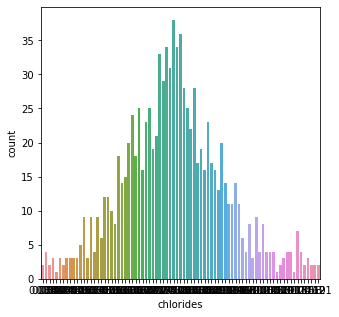

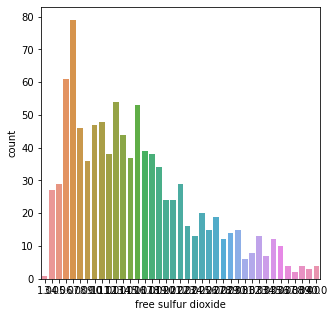

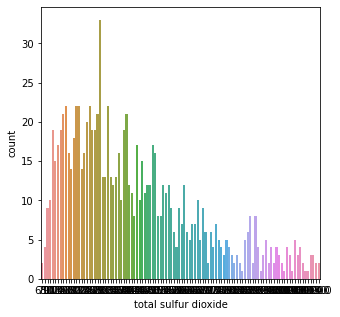

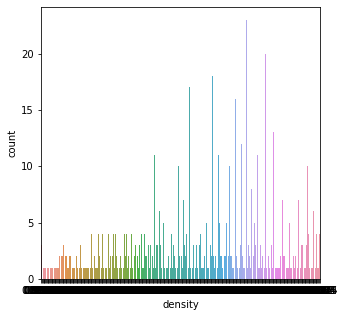

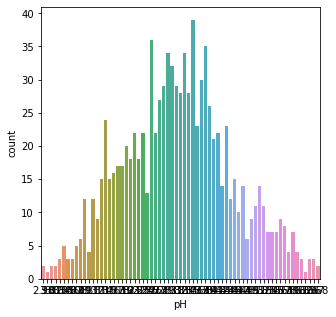

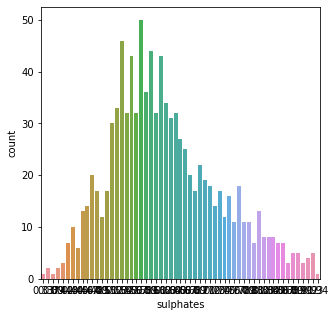

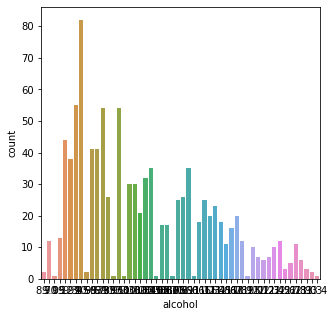

In [56]:
for var in variables:
    f = plt.figure(figsize=(5, 5))
    sb.countplot(x=var, data=df)

# Finding which level has the highest frequency

In [57]:
for var in variables:
    print(f"{df[var].value_counts().nlargest(1)}")

7.2    42
Name: fixed acidity, dtype: int64
0.58    29
Name: volatile acidity, dtype: int64
0.0    87
Name: citric acid, dtype: int64
2.0    110
Name: residual sugar, dtype: int64
0.078    38
Name: chlorides, dtype: int64
6.0    79
Name: free sulfur dioxide, dtype: int64
28.0    33
Name: total sulfur dioxide, dtype: int64
0.9972    23
Name: density, dtype: int64
3.36    39
Name: pH, dtype: int64
0.58    50
Name: sulphates, dtype: int64
9.5    82
Name: alcohol, dtype: int64


# Trying to find which variables help us predict the quality

sb.boxplot(x = 'FIXED_ACIDITY', y = 'QUALITY', data=df)

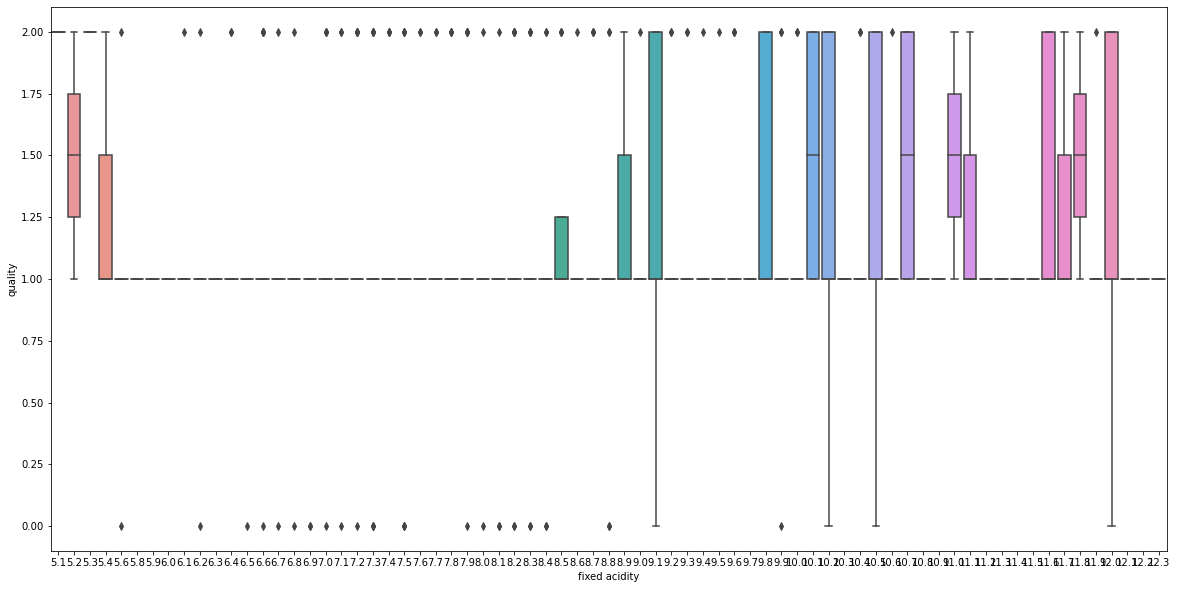

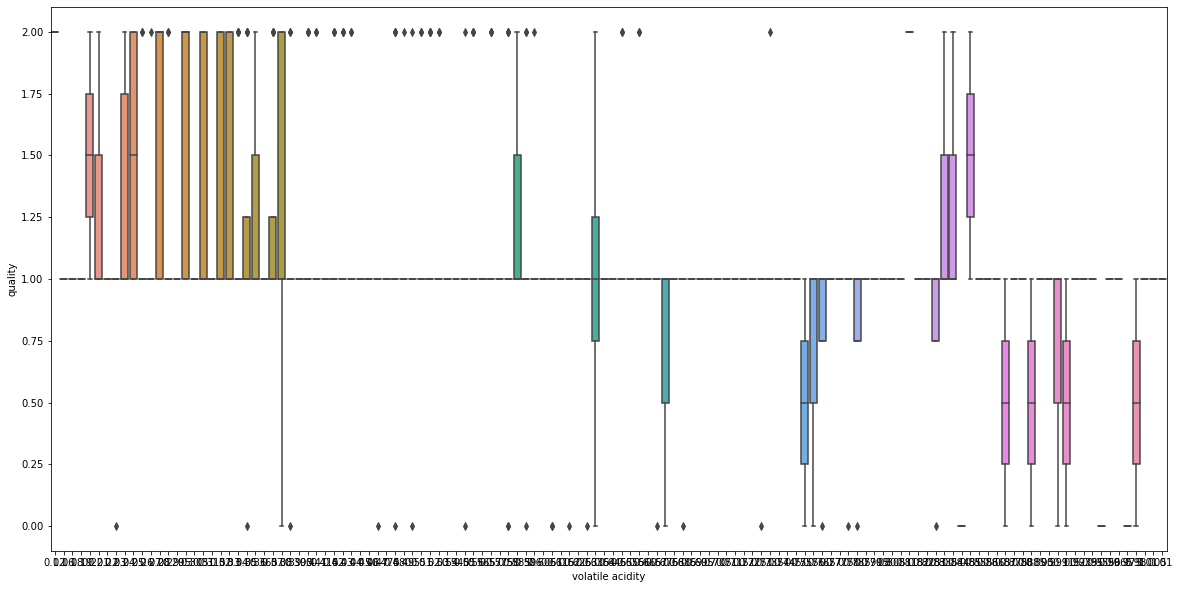

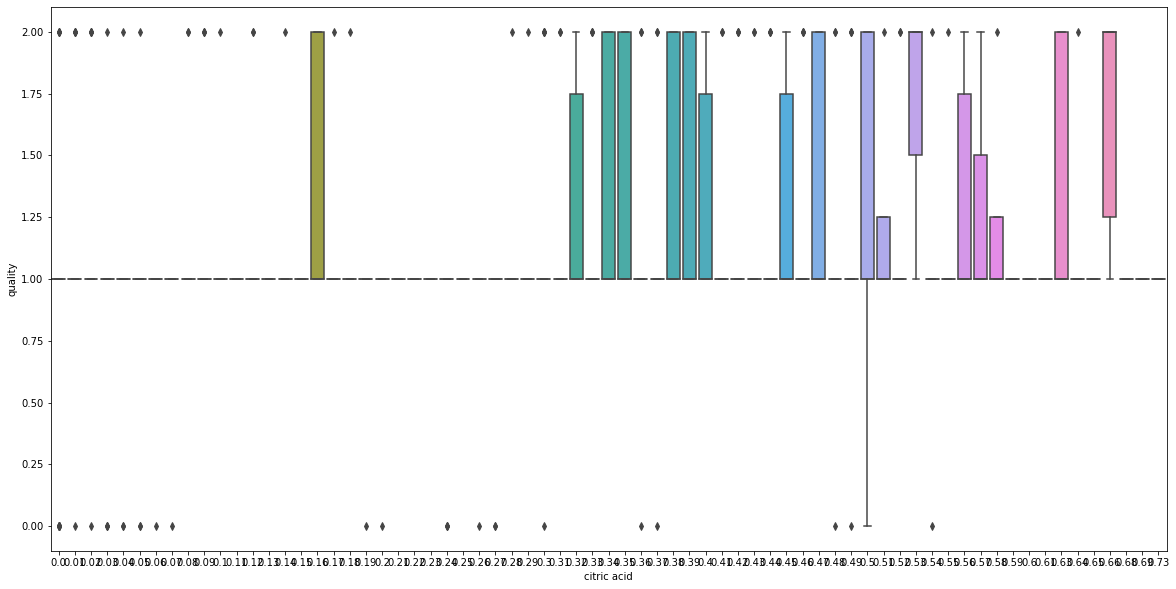

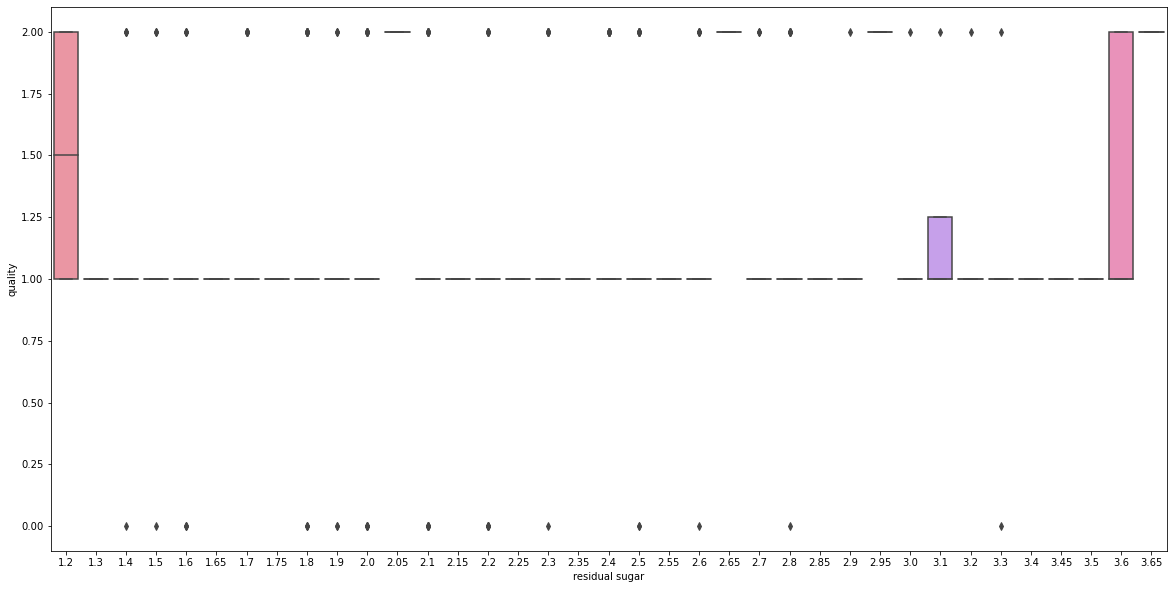

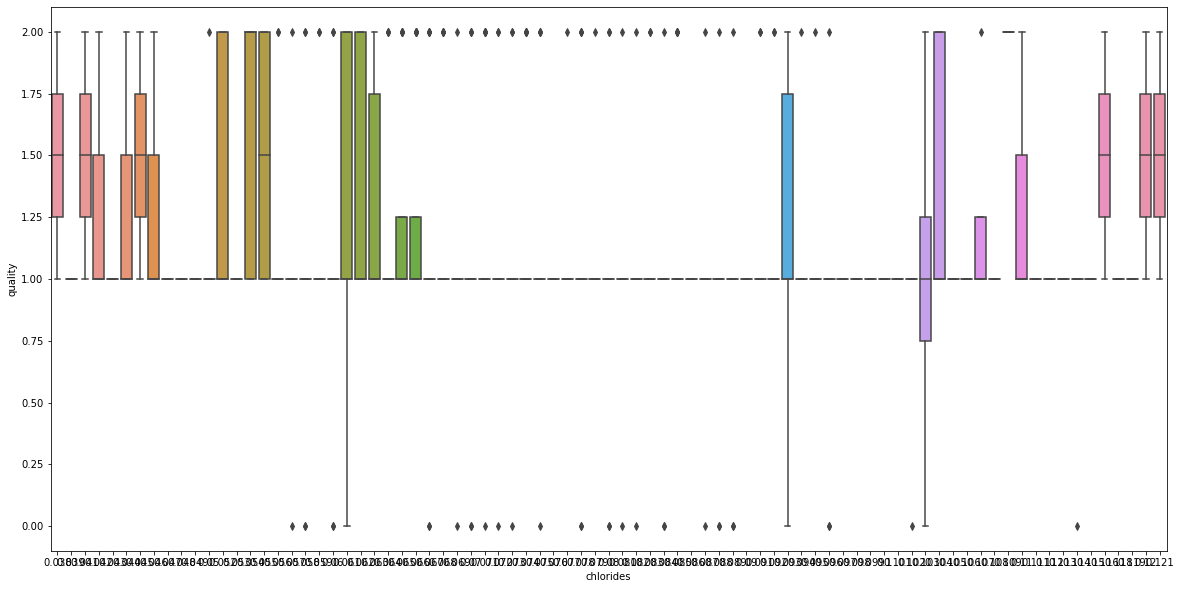

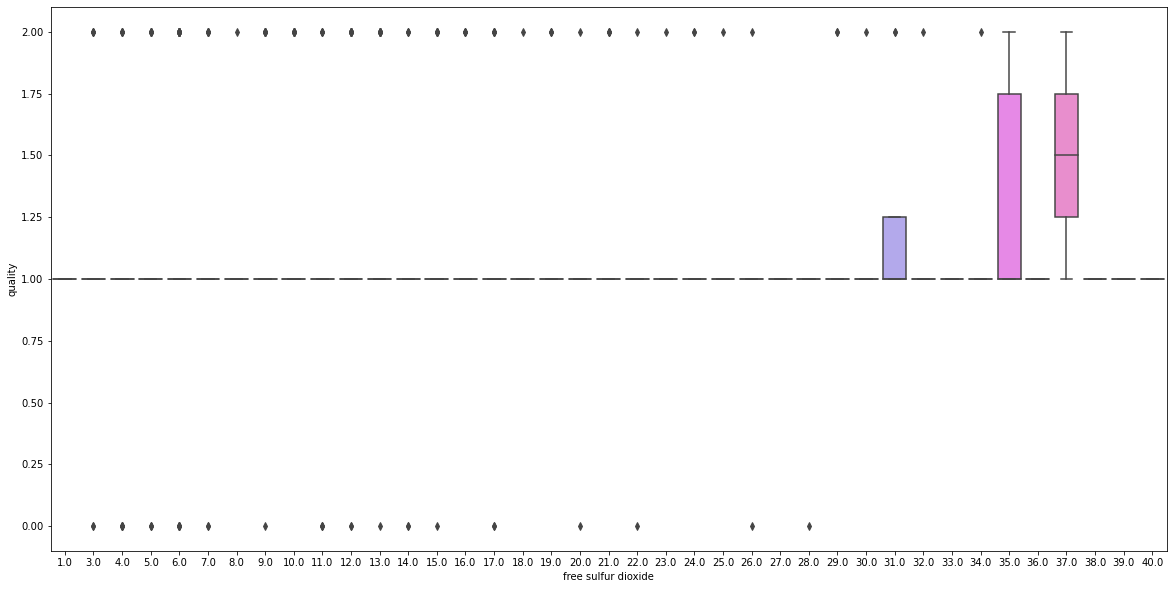

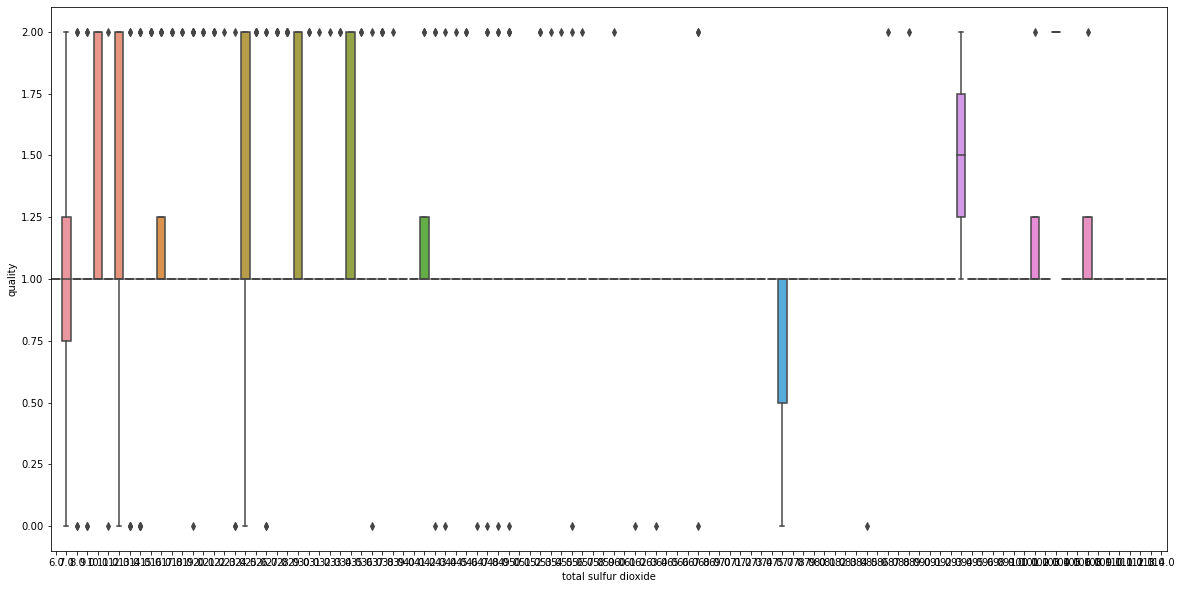

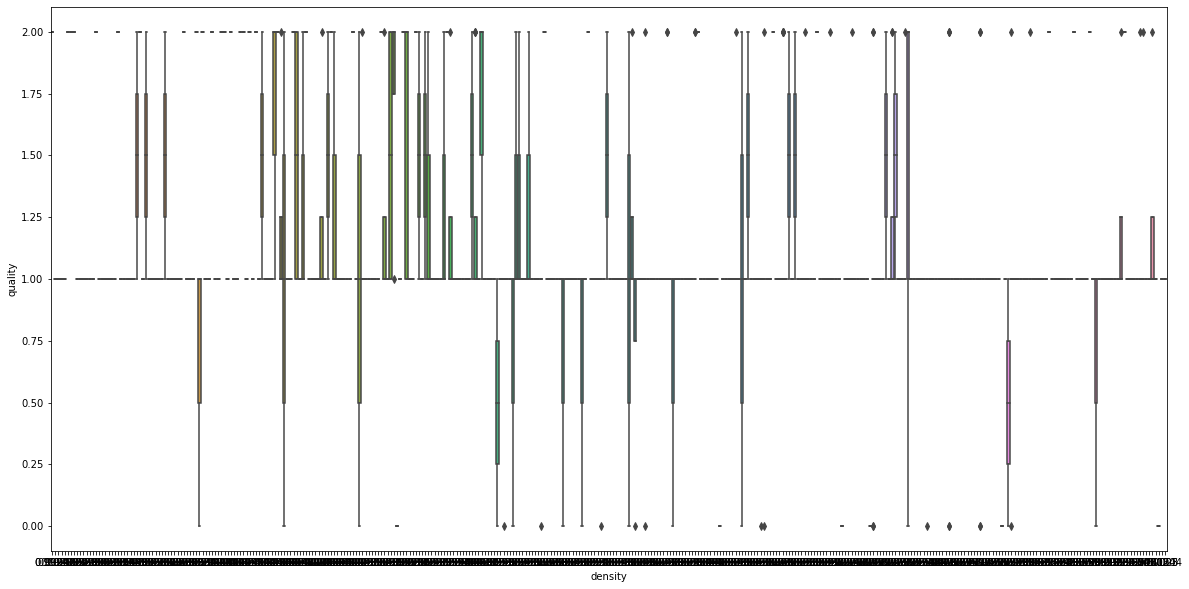

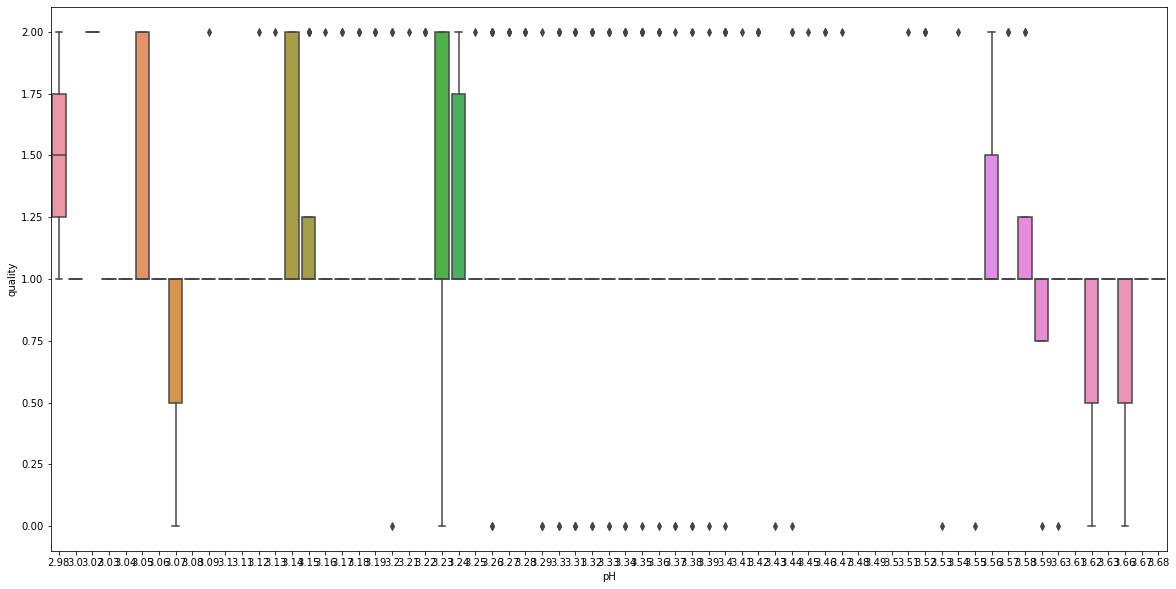

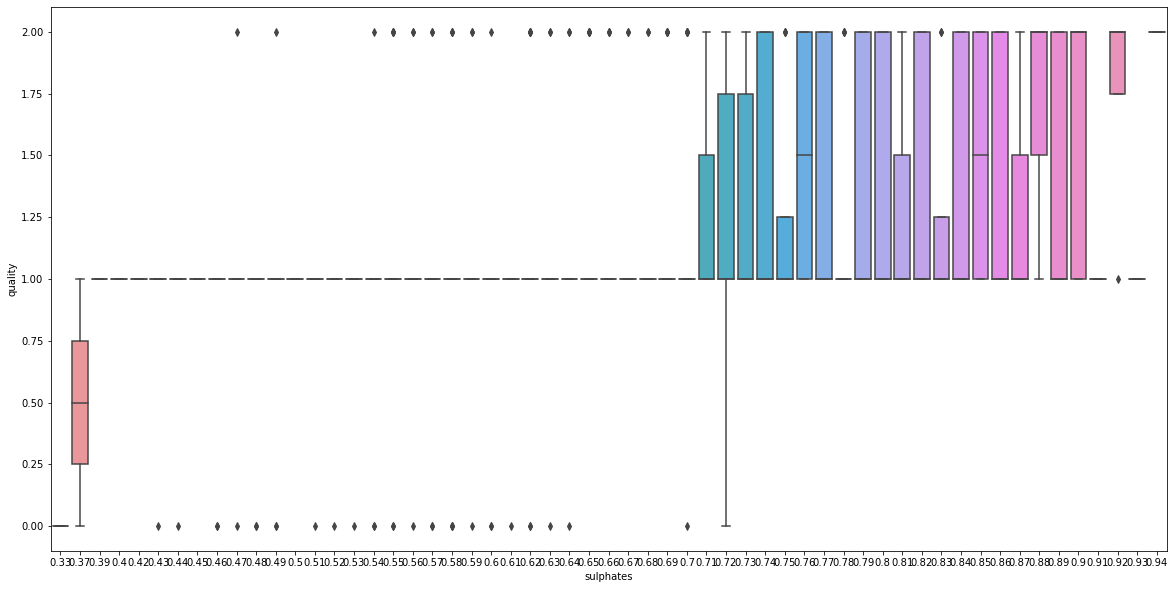

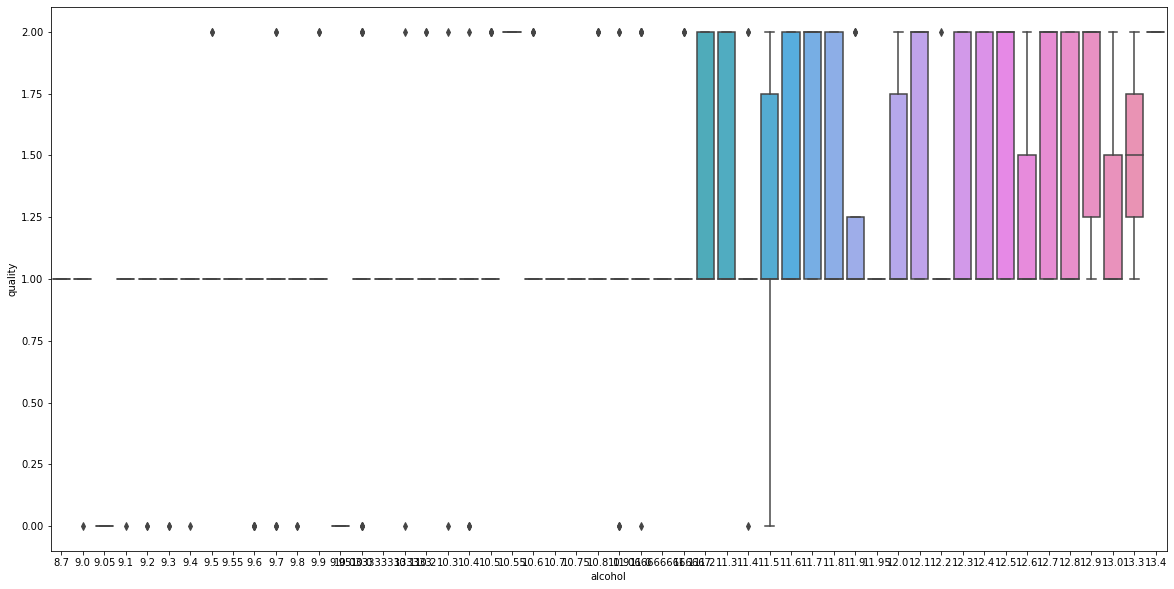

In [58]:
for var in variables:
    f = plt.figure(figsize=(20, 10))
    sb.boxplot(x=var, y='quality', data=df)

# HISTOGRAM helps

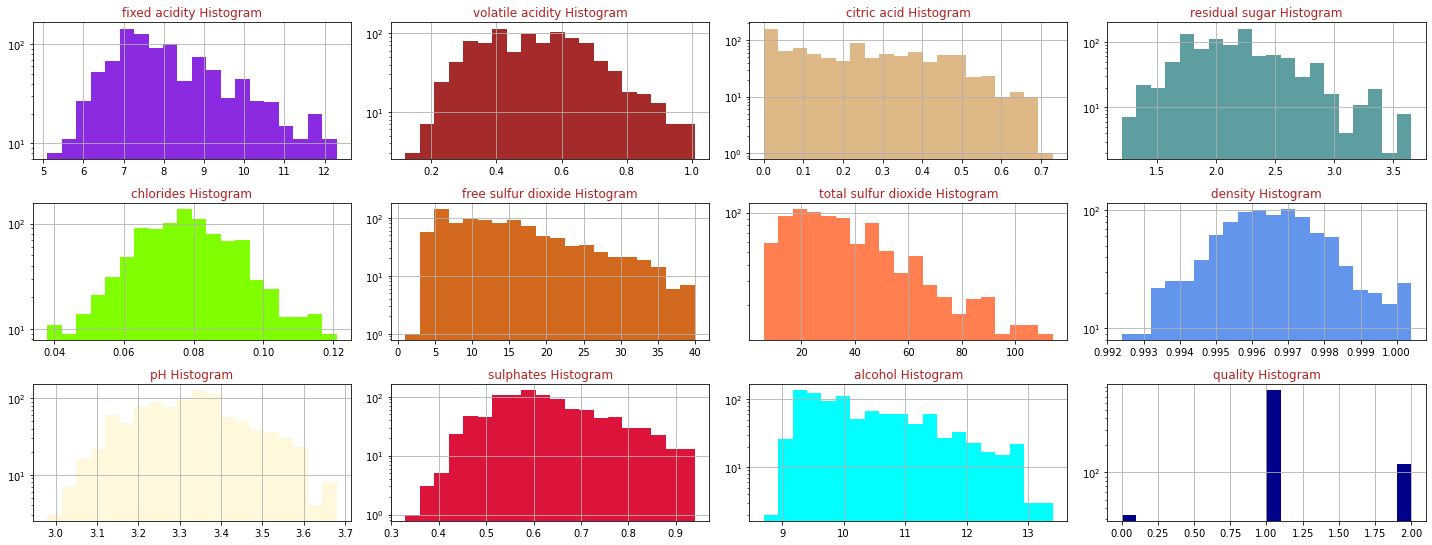

In [59]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    #plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

# Trying to find correlation

In [60]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.288516,0.653996,0.228080,0.184628,-0.150600,-0.103047,0.594811,-0.699294,0.164897,-0.020864,0.116647
volatile acidity,-0.288516,1.000000,-0.625634,0.013343,0.124037,-0.008736,0.108616,0.044555,0.250983,-0.320766,-0.231145,-0.298032
citric acid,0.653996,-0.625634,1.000000,0.150388,0.051142,-0.081912,-0.007448,0.274774,-0.480568,0.278684,0.164969,0.218354
residual sugar,0.228080,0.013343,0.150388,1.000000,0.246455,0.078124,0.158926,0.381812,-0.068465,0.046317,0.103327,0.045797
chlorides,0.184628,0.124037,0.051142,0.246455,1.000000,0.031840,0.178405,0.413761,-0.174504,-0.102031,-0.305552,-0.128923
free sulfur dioxide,-0.150600,-0.008736,-0.081912,0.078124,0.031840,1.000000,0.626561,-0.010024,0.127138,0.104110,-0.037504,-0.011967
total sulfur dioxide,-0.103047,0.108616,-0.007448,0.158926,0.178405,0.626561,1.000000,0.146110,0.017320,-0.046874,-0.250690,-0.099687
density,0.594811,0.044555,0.274774,0.381812,0.413761,-0.010024,0.146110,1.000000,-0.238390,0.047893,-0.554258,-0.177699
pH,-0.699294,0.250983,-0.480568,-0.068465,-0.174504,0.127138,0.017320,-0.238390,1.000000,0.003509,0.105050,-0.098768
sulphates,0.164897,-0.320766,0.278684,0.046317,-0.102031,0.104110,-0.046874,0.047893,0.003509,1.000000,0.293107,0.366992


<AxesSubplot:>

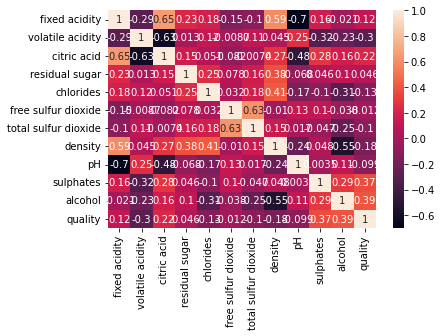

In [61]:
sb.heatmap(data=df.corr(), annot=True,)

# Performing Point Biserral Correlation

In [62]:
pbc = pointbiserialr(df['quality'], df['pH'])
pbc[1]

0.0019126932830888573

In [63]:
def pointBiserral(var):
    pbc = pointbiserialr(df['quality'], df[var])
    print(f'{var}: {pbc}')

for var in variables:
    pointBiserral(var)

fixed acidity: PointbiserialrResult(correlation=0.11664703460825798, pvalue=0.00024367669498251928)
volatile acidity: PointbiserialrResult(correlation=-0.2980320265331942, pvalue=1.179258425692166e-21)
citric acid: PointbiserialrResult(correlation=0.21835415861808832, pvalue=4.2669413361463076e-12)
residual sugar: PointbiserialrResult(correlation=0.04579654395132358, pvalue=0.1509341288206024)
chlorides: PointbiserialrResult(correlation=-0.12892287409947165, pvalue=4.949152953553811e-05)
free sulfur dioxide: PointbiserialrResult(correlation=-0.011967469930231503, pvalue=0.7075622400560126)
total sulfur dioxide: PointbiserialrResult(correlation=-0.09968712457174998, pvalue=0.0017333364225062323)
density: PointbiserialrResult(correlation=-0.1776986215520115, pvalue=1.9692572623817166e-08)
pH: PointbiserialrResult(correlation=-0.09876813882649169, pvalue=0.0019126932830888573)
sulphates: PointbiserialrResult(correlation=0.3669918927294139, pvalue=9.11432649976583e-33)
alcohol: Pointbiseri

In [65]:
pbc = pointbiserialr(df["quality"], df["alcohol"])
print("alcohol: ",pbc)

alcohol:  PointbiserialrResult(correlation=0.390144572365328, pvalue=3.67195863535227e-37)
